## **Practical work on SAR synthesis**

### Florence TUPIN, Emanuele DALSASSO, Christophe KERVAZO

Images of the practical work can be found on:
https://perso.telecom-paristech.fr/tupin/TPSAR/

You have:
- Terrasar-X images of metric resolution on Grand canyon in Colorado.
- Terrasar-X image of Paris
- ERS-1 image of Lausanne

Some useful functions are available in the file *mvalab.py*.

### Name: **Balthazar Neveu**

#### Instructions

To solve this practical session, answer the questions below. Then export the notebook with the answers using the menu option **File -> Download as -> Notebook (.ipynb)**. Then [submit the resulting file here](https://partage.imt.fr/index.php/s/zJqXJNbts85YCQd) by next week (deadline 11th of february).

### Reading of images with TélécomParis format
A useful function to read the images with Télécom-Paris format is *imz2mat*

### First step: install needed packages
In this and the following practical works, we are going to need
- numpy: a fundamental package for scientific computing with Python
- matplotlib: a Python 2D plotting library
- scipy: library for numerical integration, interpolation, optimization, linear algebra and statistics.

## **Introduction**
### Complex images
SAR images are usually complex data. Here are some useful `numpy` functions:
- to take the conjugate: `np.conj`
- to take the absolute value: `np.abs`
- to take the real part: `np.real` or `spy.real`
- to take the imaginary part: `np.imag` or `spy.imag`
- yo take the phase: `np.angle`. Value is between −π and +π.


### Fourir transfrom of an image

Python computes the Fourier transform of a 2D signal (matrix  Z) thanks to the package `scipy.fftpack`.
- `scipy.fftpack.fft2` is the basic procedure. From a real image (2D array of real numbers), it returns a matrix of complex numbers.
Be careful, the spectrum is given between 0 and 1 (in normalized frequency. To convert it between -0.5 and 0.5, you have to use `scipy.fftpack.fftshift` to center the spectrum.
- `scipy.fftpack.ifft2` gives the 2D inverse Fourier transform.
Be careful `scipy.fftpack.ifft2` usually gives a result with complex values even if the enter is a real matrix.
- Do not forget that a spectrum is complex values. To visualize it,`np.abs` transforms a complex matrix to a real matrix.

### Import the libraries and packages we are going to use
The following cell imports all that is going to be necessary for the practical work

In [1]:
!wget https://perso.telecom-paristech.fr/tupin/TPSAR/mvalab.py

--2024-02-02 15:28:16--  https://perso.telecom-paristech.fr/tupin/TPSAR/mvalab.py
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68071 (66K) [text/x-python]
Saving to: ‘mvalab.py’

mvalab.py           100%[===================>]  66,48K  --.-KB/s    in 0,02s   

2024-02-02 15:28:16 (4,31 MB/s) - ‘mvalab.py’ saved [68071/68071]



In [2]:
import math
import numpy as np
import scipy as spy
import scipy.fftpack
import scipy.signal
from scipy import ndimage
import matplotlib.pyplot as plt
import mvalab as mvalab
from urllib.request import urlopen

### SAR Images
To read an image use {mvalab.imz2mat} with input parameter the image name (or url).
It returns a list with a table of complex numbers, the number of columns and the number of lines.

In [3]:
url='https://perso.telecom-paristech.fr/tupin/TPSAR/imagesbase/'

image='coloradoDP.CXF'
imagesar=mvalab.imz2mat(url+image)
tableauimage=imagesar[0]
ncol=imagesar[1]
nlig=imagesar[2]
print(ncol)
print(nlig)


imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/tupin/TPSAR/imagesbase/coloradoDP.CXF
Nom compatible url
Nom compatible url
Complex float, Fichiers PC
INFO - reading header/dim : https://perso.telecom-paristech.fr/tupin/TPSAR/imagesbase/coloradoDP.dim
lecture .dim OK -> largeur:2048 hauteur:2048 profondeur:1
Debug 2 4 2048
4 2048 <f
2048
2048


### Visualizing SAR data
Visualize the amplitude and phase of the complex backscattered electro-magnetic field
on Grand Canyon image.
When just using imshow the full dynamic of the image is linearly converted to [0,255].
When using mvalab.visusar, a threshold is defined threshold = mean(image)+k.standard_deviation(image)
to use only the values between 0 and the threshold (values above the threshold are saturated at 255).
A usual value of k is 3 (default value).


Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 2048


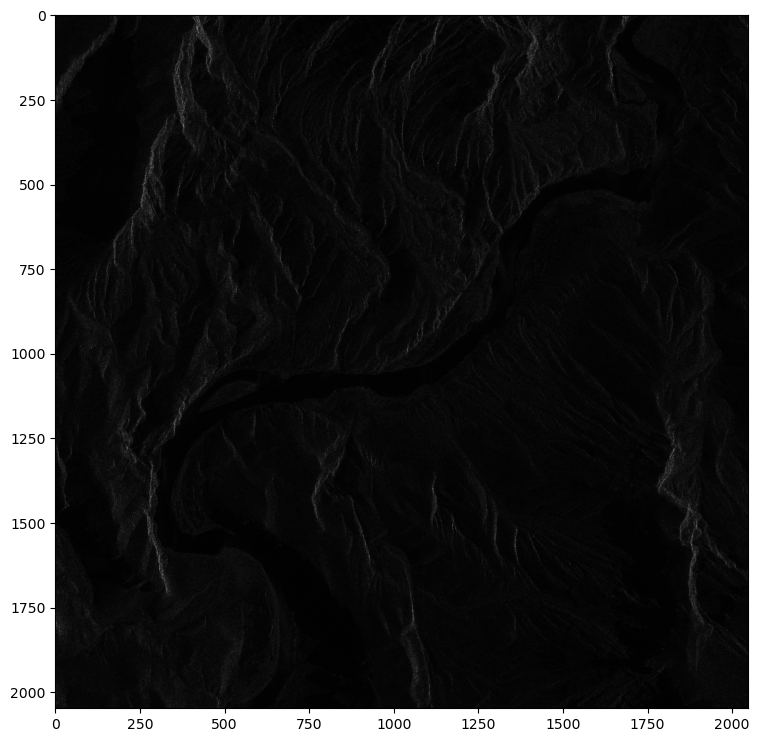

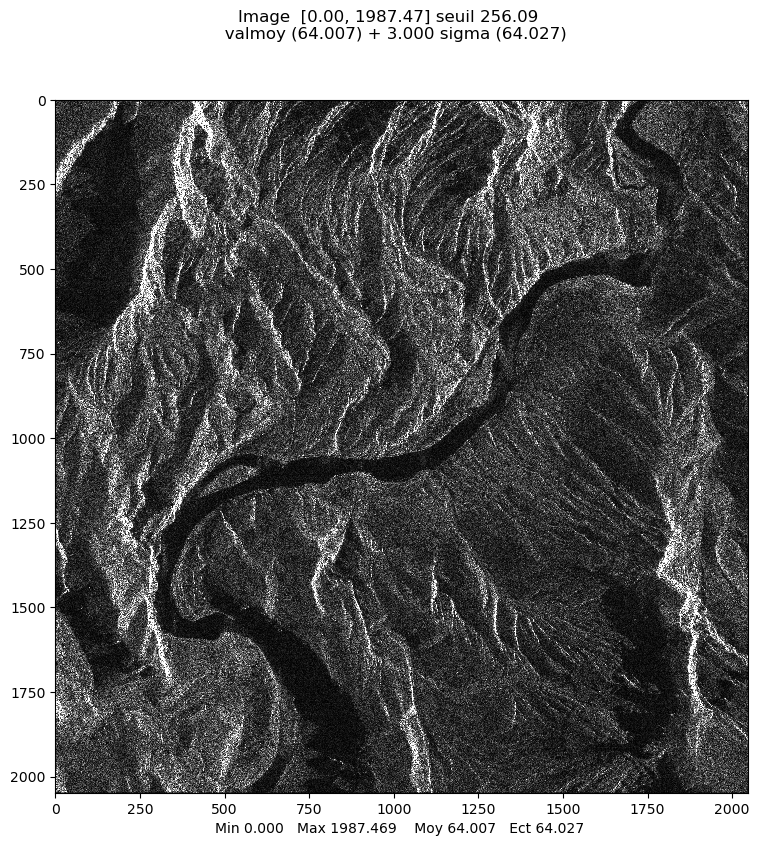

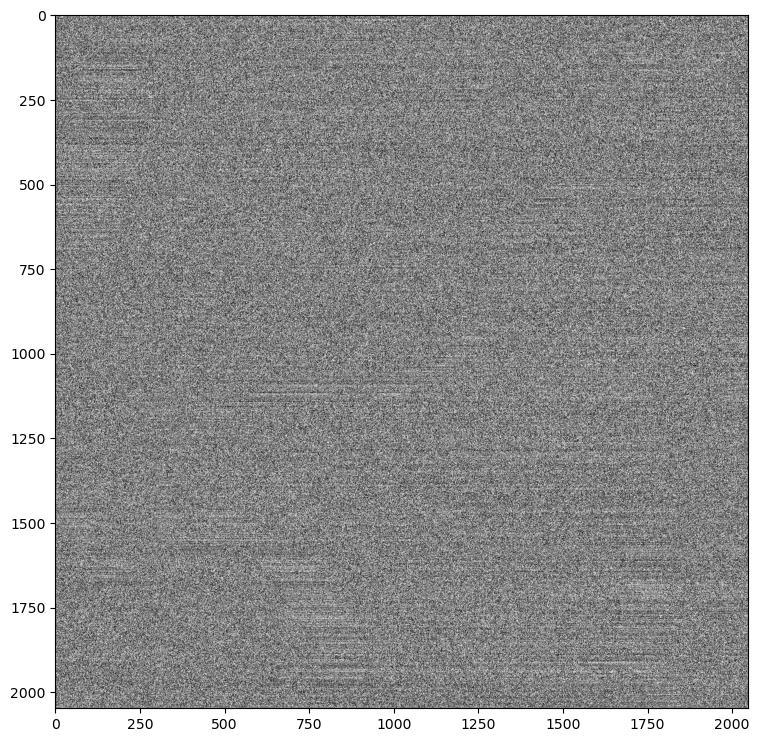

In [7]:

plt.rcParams['figure.figsize'] = [9, 9]
#visualization of amplitude data
#to be completed
plt.figure(figsize=[9,9])
#plt.imshow(,'gray')
plt.imshow(np.abs(tableauimage),'gray')

#mvalab.visusar uses a threshold th=mean+ksigma to stretch the dynamic
#two input parameters : table of pixels (absolute value) and k value to define the threshold
k = 3
mvalab.visusar(tableauimage, k) #to complete - with thresholding

#visualization of phase data
plt.rcParams['figure.figsize'] = [9, 9]
#to be completed
plt.imshow(np.angle(tableauimage),'gray')


### Question 1.a
Explain what you see in the different images of Colorado acquisition and the role of the $k$ value.
Give an interpretation of the amplitude image (which areas do you recognize)
and of the phase image.


### Answer 1.a


# **Part 1: Analysis of a SAR image**
In this part we will use an image of TerraSAR-X sensor (metric resolution) of Paris.
Check that you recognize the main buildings on this image.

In [8]:
url='https://perso.telecom-paristech.fr/tupin/TPSAR/paris/'

image='Eiffel.CXF'
tabimage=mvalab.imz2mat(url+image)
ncol=tabimage[1]
nlig=tabimage[2]

tabimage_ = tabimage[0]

imz2mat : version janvier 2018.  Fichier à ouvrir : https://perso.telecom-paristech.fr/tupin/TPSAR/paris/Eiffel.CXF
Nom compatible url
Nom compatible url
Complex float, Fichiers PC
INFO - reading header/dim : https://perso.telecom-paristech.fr/tupin/TPSAR/paris/Eiffel.dim
lecture .dim OK -> largeur:2048 hauteur:2048 profondeur:1
Debug 2 4 2048
4 2048 <f


Affichage d'une image complexe : on prend le module
plt.show dans visusar : image 2048 x 2048


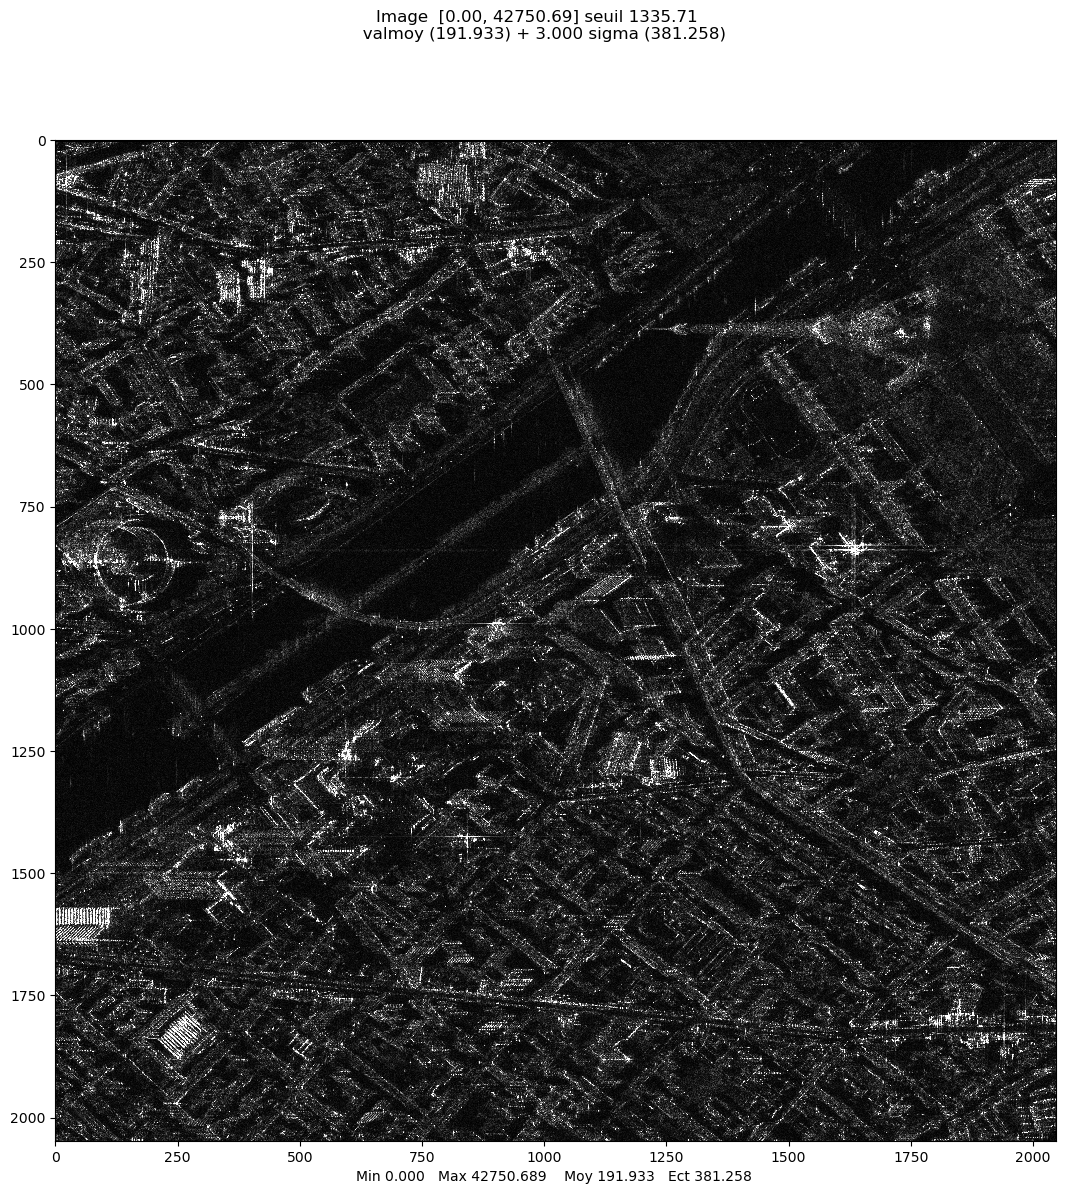

Affichage d'une image reelle
plt.show dans visusar : image 2048 x 2048


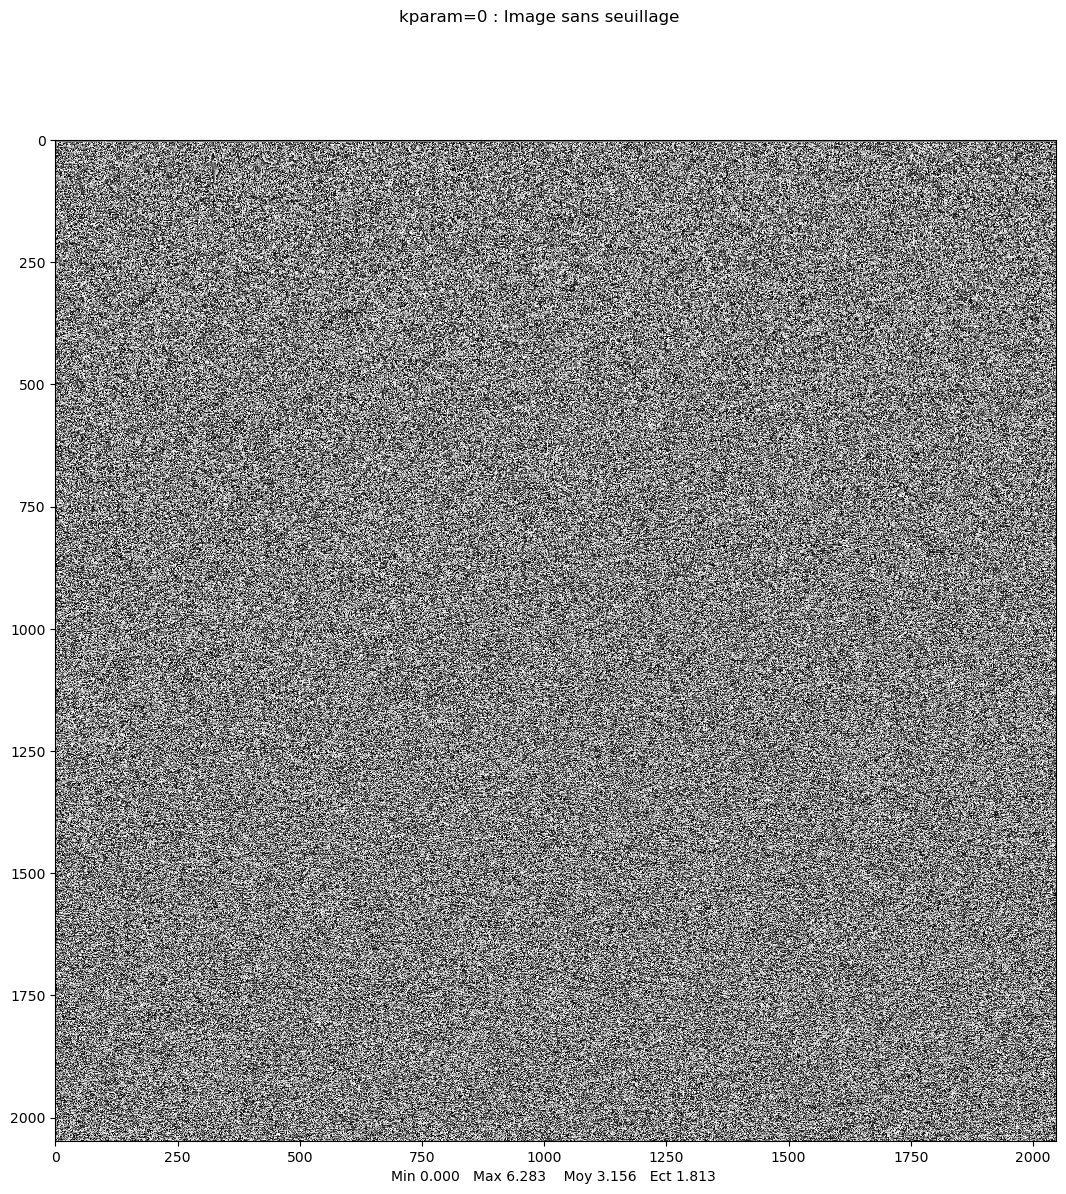

array([[2.96173915, 0.13432144, 1.07144961, ..., 0.47934139, 6.25899648,
        5.67245934],
       [3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265],
       [3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265],
       ...,
       [1.2722974 , 2.98727388, 1.96856718, ..., 1.17692772, 0.31865459,
        5.09289536],
       [0.40890783, 3.42853141, 3.59631193, ..., 4.77480779, 3.19282982,
        3.6149487 ],
       [5.13061331, 1.77255867, 0.89213384, ..., 2.8691295 , 1.18247761,
        1.63321514]])

In [9]:
plt.rcParams['figure.figsize'] = [13, 13]
mvalab.visusar(tabimage_)
mvalab.visusar(np.angle(tabimage_)+math.pi,0.)

### Analysis of a subpart of the image
Choose a sub-part of the image and visualize the amplitude image

In [ ]:
#to be completed
tabimage_crop = tabimage_[200:800,1150:1750]
mvalab.visusar(tabimage_crop)

#tabimage_crop = tabimage_[]
#mvalab.visusar()

### Question 1.b

Explain where is the sensor relatively to the scene.

Explain the appearence of the following buildings in the amplitude image : Eiffel Tower, Maison de la radio, Pont de Bir-Hakeim (you can use a [satellite optic image on googlemaps](https://www.google.com/maps/place/Eiffel+Tower/@48.851143,2.2797819,447m/data=!3m1!1e3!4m5!3m4!1s0x47e66e2964e34e2d:0x8ddca9ee380ef7e0!8m2!3d48.8583701!4d2.2944813) to help you).

Explain the appearence of water and vegetated areas.

### Answer 1.b

### Spectral analysis
Plot the modulus of complex spectrum of the image and the modulus of the Fourier transform of the image taken in amplitude.

In [ ]:
# SPECTRAL ANALYSIS mvalab.visusarspectre: plot the image and its Fourier spectrum
# for the image taken in modulus
mvalab.visusarspectre()
# for the complex image
mvalab.visusarspectre()

### Question 1.c

Explain what you see in the Fourier spectrum of the complex image. How are the two axis related to the SAR image synthesis ?

Explain what you see in the Fourier spectrum of the amplitude image.

# **Part 2: SAR synthesis using SAR RAW data**
To study the SAR synthesis we will use a ERS-1 SAR image which is provided by ESA in "raw" format.
It means that it corresponds to the image before the chirp compression in range and before the synthetic aperture in the azimuth direction.
What do you see on the raw data ? Can you recognize the area ? (It corresponds to [Leman Lake and Lausanne](https://www.google.com/maps/place/Lausanne,+Switzerland/@46.5284586,6.5824552,12z/data=!3m1!4b1!4m5!3m4!1s0x478c293ecd89a7e5:0xeb173fc9cae2ee5e!8m2!3d46.5196535!4d6.6322734)).

In [ ]:
url='https://perso.telecom-paristech.fr/tupin/TPSAR/imagesbase/'
image='lausanneED.CXF'

tabimage=mvalab.imz2mat(url+image)
ncol=tabimage[1]
nlig=tabimage[2]

mvalab.visusar(tabimage[0])
mvalab.visusar(np.angle(tabimage[0])+math.pi,0.)

In [ ]:
# visualization of the Fourier spectrum of the complex image
mvalab.visusarspectre()

### Question 2.a
Where is the lake on this image ? How can we localize Lausanne city ?

### Answer 2.a

# **Range compression (fast time)**
The raw data need to be compressed along the range direction using a matched filter.
The chirp is given and corresponds to the emitted wave of ERS sensor. The matched filter is a temporal convolution
or equivalently a multiplication of the Fourier transforms.


In [ ]:
# the chirp of ERS-1 is given in the specification of ESA
sigchirp=mvalab.chirp_ers()   #Warning only 703 points to encode the chirp
nsig=spy.size(sigchirp)
K=4.1889e+11

#display of the chirp (real and imaginary parts)
plt.rcParams['figure.figsize'] = [6, 6]
plt.figure()
plt.subplot(211)
plt.plot(spy.real(sigchirp))
plt.subplot(212)
plt.plot(spy.imag(sigchirp))
plt.show()

# display of the Fouriertransform of the chirp
##%%%
lignechirp=np.zeros(ncol,dtype=complex)
lignechirp[0:nsig]=sigchirp # padding
tfchirp=scipy.fftpack.fft(lignechirp)
plt.figure()
plt.plot(np.abs(scipy.fftpack.fftshift(tfchirp)))
plt.show()

In [ ]:
# range compression done in the Fourier transform line by line by FT multiplication
#to be completed
fft1tabimage=scipy.fftpack.fft(tabimage[0],axis=1)
fft2tabimage=np.zeros((nlig,ncol),dtype=complex)
for iut in range(nlig):
    fft2tabimage[iut,:]= # To complete

newimage=scipy.fftpack.ifft(fft2tabimage,axis=1)
mvalab.visusarspectre(newimage,u'Chirp compression step')

#########################################################################

### Question 2.b
What is the effect of the chirp convolution in the range direction ?

### Answer 2.b

# **Azimuth compression (slow time) - approximation**
We are now interested in the synthetic aperture computation in the azimuth direction. Two different compression techniques will be analysed in the following cells.
First, the synthesis is done very approximately by just adding the complex signals in column (azimuth) without doing the phase correction.
Compute a simple column convolution with a chosen size (30, 50 70 pixels for instance).

In [ ]:
#########################################################################
##############  SYNTHESIS - approximation
############## constant kernel

#choose a size for the window to do the azimuth processing
largeur=50
#create a mask of values 1 with np.ones()
masque=np.ones(largeur)
newimage_step1=np.zeros( (nlig,ncol),dtype=complex)
#do the convolution with the masque in azimuth direction - to keep the same size use mode='same'
for jut in range(ncol):
    newimage_step1[:,jut]= # To complete
montitre=u'Size of the uniform kernel : %d'%largeur
mvalab.visusarspectre(,montitre) # To complete


### Question 2.c

What is the effect of the constant kernel convolution in the range direction ?

### Answer 2.c

# **Azimuth compression (slow time) - synthetic aperture**
In this part, the real aperture synthesis is done.
To do so, first the distance from the sensor to each pixel considered in the window (in azimuth) is computed.
This distance is then used to correct the phase contribution of each pixel ($\phi=\frac{4\pi R}{\lambda}$).
The associated instant frequency is given by $f_d=\frac{1}{2\pi}\frac{d\phi}{dt}$.

In [ ]:
##############  SYNTHESIS - ERS-1 PARAMETERS (given by ESA)
##############  Modulated window
# ERS-1 parameters to process raw data
#  Program using a fixed length of synthesis (=fixed number of samples - no range migration correction)
longueurdonde = 3./53. # en cm
print(longueurdonde)
prf=1679.902 #theoretical PRF (Pulse Repetition Frequency) of ERS-1
vitessesatel=7460 # speed of the satellite in m/s
#distance from the sensor to the earth for the incidence angle of the considered area
#it corresponds to the distance between the sensor and the closest point in the swath
#(cpa closest point of approach)
dsatel=845000;  # for 24 degrees of incidence angle (considered as constant in the swath here)
#sampling in position for the sensor position in the flight direction
#deltay is the distance between two sensor positions sending a pulse= speed/pulse_frequency
deltay=vitessesatel/prf;
print(deltay)

In [ ]:
#############  SYNTHESIS - COMPUTATION OH THE MATCHED FILTER
##############  Modulated window to do the azimuth focalization
#chosen number of points for the synthetic aperture synthesis
largeur=800
NN=int(0.5*largeur)
# computation of the phase ramp and complex exponential
# replacing the "natural window" with weight 1 of the previous section
#
# sensor positions around 0 (-400 positions before, 400 positions after in meters)
tabpos=deltay*np.linspace(-NN,NN,largeur) #returns 800 evenly spaced points between -400 and 400
#tab_cpa contains a table of the cpa distances
tab_cpa=dsatel*np.ones(largeur)
#compute in tabR the distance from the point to the sensor
#for the sensor positions in tabpos using Pythagore
tabR=   #To be completed

# compute in tabR_diff the difference between tabR and tab_cpa corresponding to the distance difference
#compared to the closest position
tabR_diff=  #To be completed

# check you obtain a quadratic contribution for tabR_diff as seen in course
plt.figure()
plt.plot()
plt.show()

# convert the distance to the sensor in a phase contribution using phi=(4piR)/lambda
tab_phi =        #To be completed
#convert the phase in the complex exponential contribution (phase ramp)
tab_ramp =      #To be completed

# check if the instant frequency is linear using np.diff for the differentiation
fd =     #To be completed - instant frequency
plt.figure()
plt.subplot(311)
plt.plot(spy.real(tab_ramp))
plt.subplot(312)
plt.plot(spy.imag(tab_ramp))
plt.subplot(313)
plt.plot()
plt.show()

In [ ]:

##############  SYNTHESIS - applying the convolution filter
##############  Modulated window
######################### Warning : use the image newimage after chirp compression in distance

newimage_foc=np.zeros( (nlig,ncol),dtype=complex)
#do the matched filter by azimuth convolution with mode='same'
for jut in range(ncol):
    newimage_foc[:,jut]=
montitre=u'Number of samples used to do the synthetic aperture : %d'%largeur
# visualization de l'image focalisée et de son spectre
mvalab.visusarspectre(, montitre )
#display the image after synthetic aperture computation
mvalab.visusar(newimage_foc)
#disaply the original image for comparison
mvalab.visusar(tabimage[0])


### Question 2.d
Compare the synthesized image with the mean kernel and the one taking into account the phase variation due to the distance. Compare the image obtained after synthesis in range and azimuth direction and the original image.

### Answer 2.d

# **Azimuth multi_looking**
The size of the SLC pixel for ERS-1 are 3m in azimuth and 12m in range.
To obtain square pixels, a simple processing is averaging amplitude values
and then do an undersampling with a factor of 4.
It is even better to do the averaging on intensity values (square of the modulus)
and then take the square root.
Do you recognize Lausanne on this image ? (use google maps to have an optical view).

In [ ]:
#define a vertical mask to do the convolution
masque_vert=
#do the convolution on the intensity image obtained by z.z* (=|z|²)
ml_int=
#do the sub-sampling to obtain square pixels with improved radiometry
ml_int_sub=ml_int[::4,:]
plt.rcParams['figure.figsize'] = [20, 5]
#take the square root of the intensity to have an amplitude image (proportional to |z|)
mvalab.visusar()

### Question 2.e
What is the effect of multi-looking ? Is this image well oriented compared to a map ? Use the Lac de Bret to check this point.

### Answer 2.e

# **Example of a High Resolution image**
The obtained image after chirp compression and synthetic aperture processing is still difficult to understand because of the coarse resolution of ERS.
To illustrate these processing on a more impressive case, you can apply the following functions. Basically it is the same as before, but with dedicated chirp and distance computations.
WARNING: the range and azimuth are not the usual one (vertical = range direction, horizontal = azimuth direction).

In [ ]:
#example on the aerial image
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1vR2m7Lb2aI6Dhak4u9eR2ZPGYhasmCO5',
                                    dest_path='./HighRes.zip',
                                    unzip=True)
import sys
sys.path.append('./HighRes/')

In [ ]:
# mvalab.synthese_range reads the matrix containing the raw data and the system
#parameters and compute the synthesis in the range direction
raw_data, range_compressed_data = mvalab.synthese_range('./HighRes/data2.mat')
mvalab.visusar(raw_data)
mvalab.visusar(range_compressed_data)

In [ ]:
#mvalab.synthese_azimuth takes the range compressed image and does the azimuth compression step
compressed_data = mvalab.synthese_azimuth(range_compressed_data, './HighRes/data2.mat')
mvalab.visusar(compressed_data)

# **Part 3: Sub aperture analysis** (OPTIONNAL PART)
Let us go back to the understanding of the complex spectrum information.
Indeed, both axes of the complex Fourier transform of a Single look Complex image are related to SAR synthesis: the range (horizontal) axis is related to the chirp frequencies, and the azimuth (vertical) axis is related to the sensor positions during the Synthetic Aperture synthesis.
The target is observed by the radar for a time corresponding to the observation time. Therefore, each frequency carries information about the observed target. We can see this in the following examples, where we are going to consider only a sub part of the synthetic aperture of the radar:
- in the first example, we use a sub-set of the samples to compute the synthetic aperture (half of the samples either before of after the closest point position). It means that we do the azimuth compression using only half part of the filter, see code). We can compute two images, each one using only half of the "seen" samples during the acquisition.
- in the second example, we use only the synthesized image and we process the complex Fourier spectrum. In the Fourier spectrum, we select in azimuth (vertical positions in the spectrum) a sub-window called sub-aperture, we do zero-padding for the remaining part of the spectrum and compute the inverse Fourier transform.

In [ ]:

###################################################################################
#################### sub-aperture in the synthesis step
####################
#%%

largeur=320
tabresulSO=[]

NN=int(0.5*largeur)
tabposbase=deltay*np.linspace(-NN,NN,largeur)
tabpos=deltay*np.linspace(-NN,NN,largeur)
tabR=dsatel*np.ones(largeur);
tabR2=tabR*tabR+tabpos*tabpos
tabR2=np.sqrt(tabR2)-tabR;
tabpha =2*( 2*math.pi/longueurdonde*tabR2);  # un 2 pour l'AR
tabphabase = np.exp(1j*tabpha);

#in the following two subparts of the aperture are used to compute two images
tabselstart=[0,NN]
tabselstop=[NN,2*NN]
for iut in range(2):
    tabpha=np.copy(tabphabase)
    tabpha[tabselstart[iut]:tabselstop[iut]]=0.
    newimage_step2=np.zeros( (nlig,ncol),dtype=complex)
    for jut in range(ncol):
        newimage_step2[:,jut]= spy.convolve(newimage[:,jut],tabpha,mode='same')
    montitre=u'Size of the selected samples : (%d,%d)'%(tabselstart[iut],tabselstop[iut])
    mvalab.visusarspectre(newimage_step2, montitre )
    tabresulSO.append(newimage_step2)

plt.rcParams['figure.figsize'] = [21, 21]
plt.figure()
plt.subplot(121)
mvalab.visusarZ(tabresulSO[0])
plt.subplot(122)
mvalab.visusarZ(tabresulSO[1])
plt.show()

##################################################################################

In [ ]:

###################################################################################
####################  sub-aperture using the spectrum of the synthesized complex image
####################
#%%

mvalab.visusarspectre(newimage_foc)
imafft=scipy.fftpack.fftshift(scipy.fftpack.fft2(newimage_foc))
mvalab.visusar(imafft)
#%%

imafiltrefft=np.zeros((nlig,ncol),dtype=complex)
imafiltrefft[int(nlig/2)-largeur:int(nlig/2),:]=imafft[int(nlig/2)-largeur:int(nlig/2),:]
#imafiltrefft[1024:1300,:]=imafft[1024:1300,:]

tabresulsousbande=scipy.fftpack.ifft2(scipy.fftpack.fftshift(imafiltrefft))
mvalab.visusarspectre(tabresulsousbande)



## Question 3.a
Compare the different results obtained using sub-apertures either on the raw data or on the synthetized image.

## Answer 3.a

# **Sub-aperture on TerraSAR-X image of Paris**
To understand the effects of sub-aperture decomposition, select a sub-aperture and synthesize different images for different selected bands. Observe some bright scatterers and see how they vary in the different sub-parture selections.
How can you explain the variations of the backscattered signals for the different sub-apertures ?

In [ ]:
###################################################################################
####################  sub-aperture using the spectrum of the synthesized image - PARIS
####################
#%%

mvalab.visusarspectre(tabimage_,'original image')
imafft=scipy.fftpack.fftshift(scipy.fftpack.fft2(tabimage_))
#%%
#take other values for the selected frequencies and study some specific strong targets
f1 = 1000
df = 200
imafiltrefft=np.zeros((nlig,ncol),dtype=complex)
imafiltrefft[f1:f1+df,:]=imafft[f1:f1+df,:]

tabresulsousbande=scipy.fftpack.ifft2(scipy.fftpack.fftshift(imafiltrefft))
mvalab.visusarspectre(tabresulsousbande,'sub-aperture filtered image')

### Question 3.b
Choose different values for $f_1$ and $d_f$. Comment the images you see: what is the influence of these parameters on the type of reflection you see and on the resolution?

### Answer 3.b